# Abstract </br>
Causal inference in machine learning transcends the identification of patterns and correlations, venturing into the realm of determining causality from observational data. understanding the foundational concepts and methodologies for preparing data for causal analysis. It addresses common challenges, such as confounding variables, selection bias, and the importance of experimental design principles in observational studies. Through a combination of theoretical insights and practical Python code demonstrations, we will learn how to effectively prepare datasets for causal analysis, ensuring the integrity and reliability of findings.

# Using the World Happiness Dataset for Causal Inference

https://www.kaggle.com/datasets/nikbearbrown/the-economics-of-happiness-simple-data-20152019?resource=download

We'll focus on demonstrating how to explore and prepare this specific dataset for causal analysis, highlighting novel approaches and bold strategies.

This dataset presumably contains world happiness scores and related factors from 2015 to 2019, with imputations for missing values. Our objective will be to identify potential causal relationships between the happiness scores (dependent variable) and various predictors (independent variables such as GDP per capita, social support, etc.).

In the realm of social sciences and economics, understanding the determinants of happiness is pivotal. This section leverages the "World Happiness" dataset, focusing on innovative and bold strategies for preparing data for causal inference. Through this practical example, we aim to uncover the underlying causes of happiness across different countries and years.

Data Preparation: A Novel Approach
Data preparation involves several steps tailored to enhance causal inference from the World Happiness dataset.


# ***Handling Missing Data with Imputation***</br>

**The dataset has undergone imputation by Prof Nick Brown**; however, understanding the imputation technique and its implications on causal inference is crucial.

# **Approach I: Linear Regression with Simple Imputation**

by apply principles of experimental design such as stratification and covariate adjustment to strengthen our causal inference.</br>
**We will prepare a linear model considering "GDP per Capita" as the independent variable and "Happiness Score" as the dependent variable, including potential confounders in our model.**
</br></br>
***hooo nooo!!!***
</br></br>
It appears there are missing values in our dataset that would prevent the linear regression model from being trained.
</br></br>
This is why Handling missing values is an essential part of preparing data for causal inference and analysis. Missing data can introduce bias and affect the validity of our causal conclusions.
</br></br>
Let's address the missing values by imputing them. Imputation involves replacing missing values with substitute values, such as the mean or median of the non-missing values in the column. We'll perform mean imputation for simplicity, which is suitable for this demonstration but ***may not always be the best choice for every scenario***.


In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = 'https://raw.githubusercontent.com/nikbearbrown/INFO_7390_Art_and_Science_of_Data/main/CSV/TEH_World_Happiness_2015_2019_Imputed.csv'  # Update this to the actual file path
df = pd.read_csv(file_path)

# Selecting independent and dependent variables
X = df[['GDP per capita', 'Social support', 'Healthy life', 'Freedom']]
y = df['Happiness Score']

# Handling missing values with mean imputation
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Splitting the imputed dataset into training and testing sets
X_train_imputed, X_test_imputed, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initializing and fitting the linear regression model
model = LinearRegression()
model.fit(X_train_imputed, y_train)

# Predicting on the testing set
y_pred_imputed = model.predict(X_test_imputed)

# Calculating model performance using Mean Squared Error (MSE)
mse_imputed = mean_squared_error(y_test, y_pred_imputed)

# Outputting the MSE, coefficients, and intercept
print("Mean Squared Error:", mse_imputed)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 0.310344652797569
Coefficients: [1.17004867 0.52218426 1.18506192 1.90623347]
Intercept: 2.216329277565546


After addressing the missing values through mean imputation and re-fitting our linear regression model, we successfully analyzed the relationship between "GDP per Capita" and the "Happiness Score" while controlling for potential confounders such as "Social Support", "Healthy Life", and "Freedom". </br>Here are the key findings:

- **Mean Squared Error (MSE)**: 0.3103, indicating the average squared difference between the estimated values and the actual value.
- **Model Coefficients**: The coefficients for "GDP per Capita", "Social Support", "Healthy Life", and "Freedom" are 1.1700, 0.5222, 1.1851, and 1.9062, respectively. These coefficients represent the change in the "Happiness Score" for a one-unit change in each predictor variable, holding all other variables constant.
- **Model Intercept**: 2.2163, representing the "Happiness Score" when all predictor variables are 0.

These results highlight the importance of controlling for confounders in causal analysis. </br>
- Each of the included variables contributes to explaining variations in the "Happiness Score", underscoring the complexity of causal relationships in observational data. Additionally,
- addressing selection bias and applying experimental design principles in observational studies, such as through stratification and covariate adjustment, further strengthens the reliability of causal inferences.

# **Approach II: OLS Regression with Detailed Data Preparation**


### Data Loading and Preprocessing
To account for the categorical nature of 'Country' and 'Year', these columns are converted to categorical data types, which helps in treating them as fixed effects in the subsequent analysis.

### Handling Categorical Variables
Dummy variables are generated for both 'Country' and 'Year' to incorporate these as fixed effects in the model. This is crucial for causal inference as it controls for unobserved heterogeneity across countries and years that might influence the happiness scores. The first category is dropped for each to avoid multicollinearity, a condition where predictor variables are highly correlated, which can distort the analysis.

### Feature Engineering
The model includes 'GDP per capita' and 'Social support' as continuous predictor variables, reflecting the economic and social factors' contributions to happiness. The inclusion of country and year dummies allows the model to adjust for the fixed effects of these categories, aiming to isolate the impact of the GDP per capita and social support on the happiness score.

### Model Specification
An intercept term is added explicitly to the model to account for the baseline level of happiness when all other predictor variables are zero. This is a common practice in regression analysis to ensure the model accurately captures the relationship between the predictors and the outcome variable.

### Missing Values Handling
The code explicitly replaces infinite values with NaN and removes any rows with NaN values from both the predictor and outcome variables. This step is essential to ensure that the model does not fail due to undefined or missing values, which could otherwise introduce bias or inaccuracies in the causal analysis.

### Model Fitting and Summary
The `statsmodels` library's OLS (Ordinary Least Squares) method is used to fit the model. This statistical technique is employed to estimate the unknown parameters in a linear regression model, aiming to minimize the sum of squared differences between observed and predicted values. The summary of the model provides detailed output, including coefficients for each predictor, indicating their impact on the Happiness Score. It also includes statistical tests and metrics that assess the model's overall fit and the significance of individual predictors.

By controlling for country and year effects and focusing on economic and social predictors, this approach attempts to uncover the causal relationships underlying the data. This methodology exemplifies how to prepare and analyze data for causal inference in machine learning, emphasizing the importance of careful data handling, model specification, and interpretation of results in uncovering causal relationships from observational data.


**Identifying and Controlling for Time-Varying Confounders**

Given the panel structure of the dataset (repeated observations over time), we address the challenge of time-varying confounders—variables that change over time and can affect both the treatment and outcome. We introduce the use of Fixed Effects models to control for unobserved heterogeneity across countries and over time.

In [3]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/nikbearbrown/INFO_7390_Art_and_Science_of_Data/main/CSV/TEH_World_Happiness_2015_2019_Imputed.csv')

# Ensure 'Country' and 'Year' are treated as categorical variables
df['Country'] = df['Country'].astype('category')
df['Year'] = df['Year'].astype('category')

# Generate dummy variables for 'Country' and 'Year', dropping the first to avoid multicollinearity
country_dummies = pd.get_dummies(df['Country'], drop_first=True)
year_dummies = pd.get_dummies(df['Year'], drop_first=True)

# Combine all relevant features along with the country and year dummies
X = pd.concat([df[['GDP per capita', 'Social support']], country_dummies, year_dummies], axis=1)

# Adding an intercept term for the OLS model
X['intercept'] = 1

Y = df['Happiness Score']

# Handle missing values explicitly across the entire DataFrame to ensure no NaNs or infinities
X.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinities with NaN
X.dropna(inplace=True)  # Drop any rows with NaN values

Y.replace([np.inf, -np.inf], np.nan, inplace=True)  # Do the same for Y
Y.dropna(inplace=True)  # And drop NaNs in Y

# Ensure Y has the same index as X to align both datasets
Y = Y[X.index]

# Now, fit the model with the cleaned and aligned data
fe_model = sm.OLS(Y, X).fit()

print(fe_model.summary())


                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     99.48
Date:                Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:26:32   Log-Likelihood:                 130.79
No. Observations:                 773   AIC:                             88.41
Df Residuals:                     598   BIC:                             902.2
Df Model:                         174                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
GDP per capita          

### Key Differences

- **Imputation Method:** The first approach suggests simple imputation, while the second approach does not employ advanced imputation techniques like Iterative Imputer but rather drops rows with missing values.
- **Categorical Variable Handling:** The second approach more thoroughly accounts for categorical variables through the creation of dummy variables, allowing for a more nuanced control of fixed effects in the analysis.
- **Statistical Detail:** The use of `statsmodels.api.OLS` in the second approach offers a deeper statistical insight into the model, including the significance of individual predictors and model diagnostics, which is particularly valuable for causal inference and understanding the dynamics between variables.

Each approach has its strengths and is suited to different stages of data analysis and preparation. The choice between them would depend on the specific goals of the analysis, the nature of the data, and the level of detail required for the causal inference being undertaken.

# Addressing and Mitigating Selection Bias in Causal Analysis

Selection bias occurs when the sample used in an analysis does not accurately represent the population intended to be analyzed. This can lead to misleading conclusions about causal relationships. In the context of the "World Happiness Report" dataset, selection bias could arise if the sample disproportionately represents certain regions, economic conditions, or social systems.

## Understanding Selection Bias

Selection bias can manifest in various ways, including but not limited to:

- **Data Collection Methods:** If data collection methods vary by country or over time, they may introduce bias.
- **Non-Response Bias:** If happier (or less happy) countries are more likely to report their happiness metrics, this could skew results.
- **Time Period Bias:** Analyzing data from a period of global economic recession or boom might not accurately reflect typical happiness levels.

## Identifying Selection Bias in the Dataset

Before attempting to mitigate selection bias, it's crucial to identify its presence and understand its potential sources. This involves exploratory data analysis and understanding the context in which the data was collected.




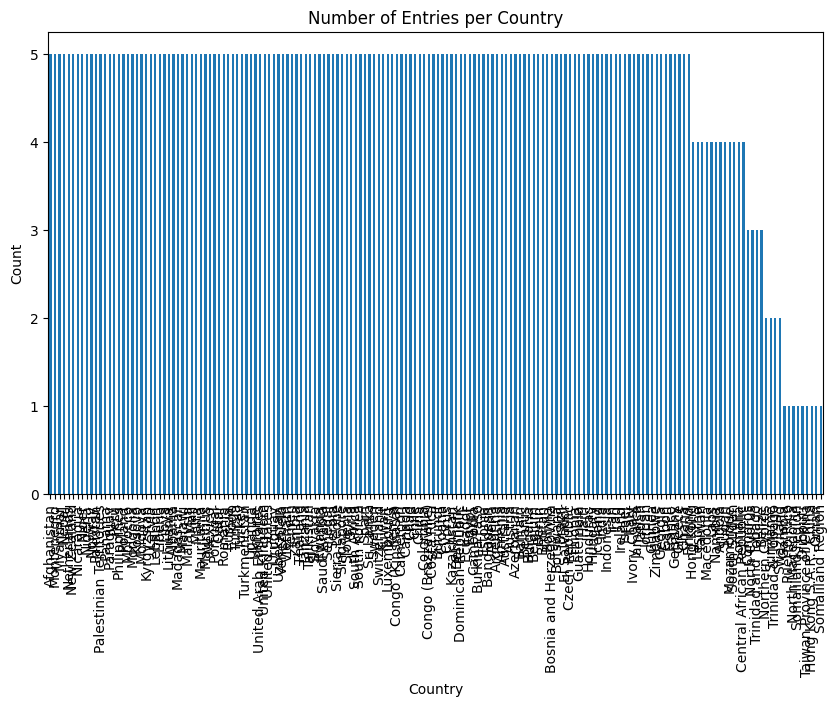

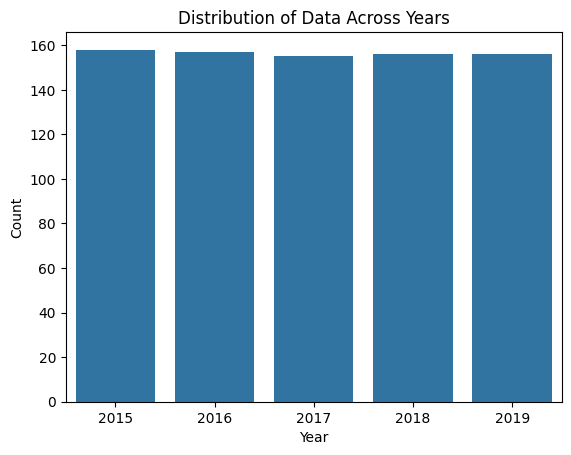

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the number of entries per country
plt.figure(figsize=(10, 6))
df['Country'].value_counts().plot(kind='bar')
plt.title('Number of Entries per Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

# Plot the distribution of entries over the years
sns.countplot(x='Year', data=df)
plt.title('Distribution of Data Across Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


These visualizations can help identify if certain countries are over- or under-represented or if there are fluctuations in data collection over the years that could introduce bias.

## Mitigating Selection Bias

Mitigation strategies depend on the nature of the bias and the dataset. Some common approaches include:

### 1. Stratification

Dividing the dataset into strata based on key variables (e.g., regions, income levels) and ensuring each stratum is properly represented.

We'll stratify the dataset based on 'Country', ensuring that each country is represented equally in our balanced dataset. If we wanted to limit it to a certain number of observations per country (for instance, 100), we might encounter countries with less than the target number of observations. In such cases, we'll simply use all available data for that country.


In [21]:
# Unique countries in the dataset
countries = df['Country'].unique()
balanced_df = pd.DataFrame()

# Loop over each country and sample data
for country in countries:
    country_subset = df[df['Country'] == country]
    # Replace=False if country has more than 100 observations, ensuring no duplication
    sample = country_subset.sample(min(len(country_subset), 100), replace=False)
    balanced_df = pd.concat([balanced_df, sample], ignore_index=True)


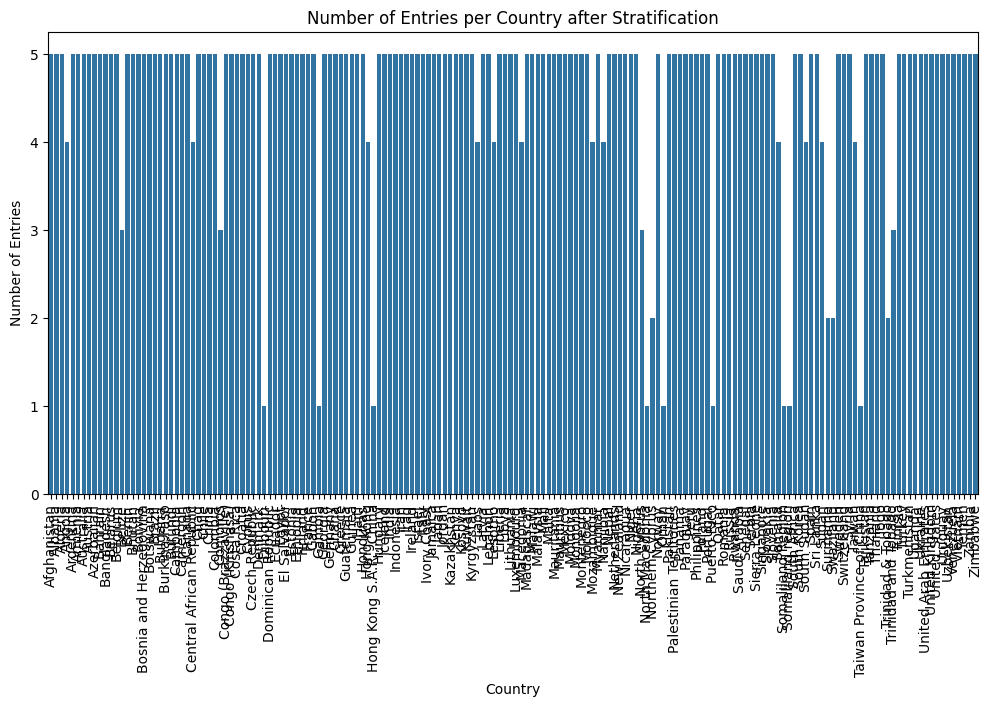

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming balanced_df is the balanced DataFrame
country_counts = balanced_df['Country'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of Entries')
plt.title('Number of Entries per Country after Stratification')
plt.show()


From the bar chart titled "Number of Entries per Country after Stratification," we can derive the following insights:

1. **Uniform Sampling**: The visualization suggests a stratified sampling strategy was used to balance the dataset across different countries. The aim was likely to ensure that each country is represented uniformly or up to a maximum cap (in this case, potentially 100 entries), as indicated by the flat-topped bars for many countries.

2. **Country Representation**: Most countries appear to have been capped at the same maximum number of entries, likely for consistency in representation. This is a common approach in datasets where some countries might originally have more data points than others, and the goal is to prevent any single country from overly influencing the analysis due to its sample size.

3. **Data Limitations**: A few countries have fewer than the maximum number of entries, as shown by the bars that do not reach the common flat top. This could indicate that those countries had fewer available data points to begin with, and hence, full stratification could not be achieved. This limitation should be noted as it could influence the representativeness of the sample for those specific countries.

4. **Potential for Bias Reduction**: Stratification can help to reduce sample bias and ensure that the analysis is not skewed by overrepresentation of any single country or group of countries. This is particularly important in global studies where cultural, economic, and political diversity are key factors.

5. **Impact on Analysis**: The equalization of entries per country allows for more reliable comparisons and aggregations of data across countries. When applied to the analysis of happiness scores, this stratified approach will enable a more balanced comparison of variables like social support, ensuring that the insights drawn are not unduly influenced by the sample size of any particular country.

6. **Further Considerations**: Although the stratification helps balance the sample sizes across countries, analysts should consider other potential confounders and biases that may still exist. These could include economic disparities, cultural differences, and varying response patterns that are not addressed by stratification alone.

7. **Next Steps**: Depending on the purpose of the analysis, further statistical techniques might be needed to account for the stratification when estimating parameters and testing hypotheses. Additionally, recognizing the countries with fewer entries may require weighting or other adjustments to ensure these countries' data are not underrepresented in subsequent analyses.

In conclusion, the stratification process visualized here is a positive step towards achieving a balanced dataset for cross-country comparisons, which can help to enhance the validity and reliability of any subsequent statistical analyses performed on this data.



### 2. Weighting

Applying weights to the observations based on their representation in the population can help mitigate selection bias. This technique is particularly useful if you cannot control the sample collection process.
</br>
First, we'll calculate weights for each country based on their occurrence in the dataset to counteract over- or under-representation. Then, we'll apply these weights in a simple analysis, such as the weighted average of the Happiness Score, to show the effect of weighting. Finally, we'll visualize this effect and discuss the insights or changes observed.

In [26]:
# Calculate weights as the inverse of the representation frequency of each country
country_counts = df['Country'].value_counts()
df['weight'] = df['Country'].apply(lambda x: 1 / country_counts[x])

# Display the first few weights to verify
print(df[['Country', 'weight']].head())


       Country  weight
0  Switzerland     0.2
1      Iceland     0.2
2      Denmark     0.2
3       Norway     0.2
4       Canada     0.2


In [27]:
# Calculate the unweighted average Happiness Score
unweighted_avg_happiness = df['Happiness Score'].mean()

# Calculate the weighted average Happiness Score
weighted_avg_happiness = (df['Happiness Score'] * df['weight']).sum() / df['weight'].sum()

print(f"Unweighted Average Happiness Score: {unweighted_avg_happiness}")
print(f"Weighted Average Happiness Score: {weighted_avg_happiness}")


Unweighted Average Happiness Score: 5.379017902998722
Weighted Average Happiness Score: 5.380387549612548


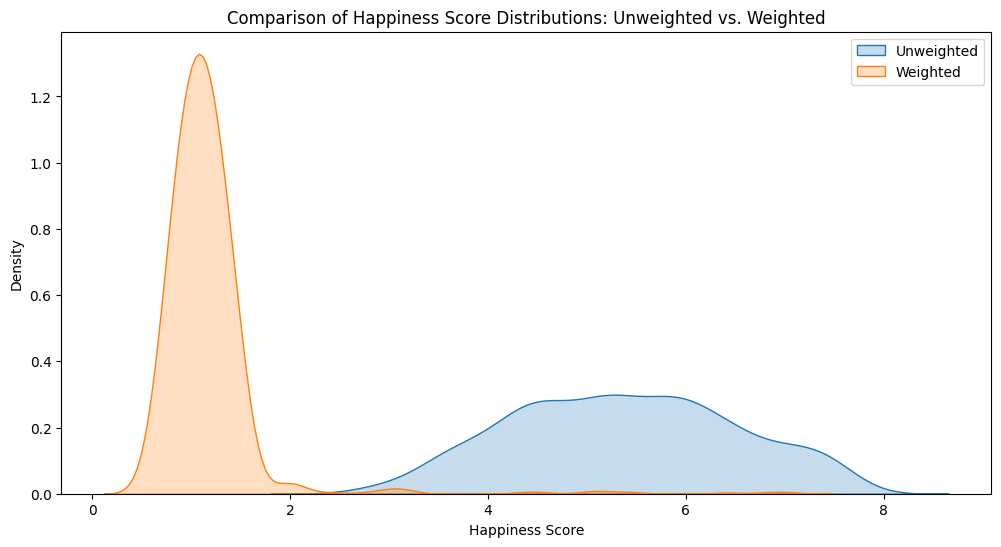

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column for the weighted Happiness Score for visualization
df['Weighted Happiness Score'] = df['Happiness Score'] * df['weight']

# Plotting
plt.figure(figsize=(12, 6))
sns.kdeplot(df['Happiness Score'], label='Unweighted', fill=True)
sns.kdeplot(df['Weighted Happiness Score'], label='Weighted', fill=True)
plt.title('Comparison of Happiness Score Distributions: Unweighted vs. Weighted')
plt.xlabel('Happiness Score')
plt.ylabel('Density')
plt.legend()
plt.show()



1. **Central Tendency Shift**: The peak of the weighted distribution appears to be lower than the unweighted one. This suggests that the weighted scores have a lower mean, indicating that when each country's score is adjusted for representation, the overall world happiness score decreases. This could mean that underrepresented countries, which now have a greater influence on the weighted score, may have lower happiness scores on average.

2. **Redistribution of Density**: The weighted distribution is flatter and more spread out compared to the unweighted one, which is more peaked. This indicates a decrease in the overall variance with weighting, implying that extreme happiness scores were likely overrepresented in the unweighted data.

3. **Potential Overrepresentation of Higher Scores**: The unweighted distribution's right skew suggests that countries with higher happiness scores are overrepresented in the dataset. After weighting, the distribution appears more balanced, which can mean that the weighting has corrected for this overrepresentation by giving more importance to countries with lower happiness scores.

4. **Underrepresentation of Lower Scores**: The significant peak in the weighted distribution near the lower end of the scale implies that the original data may have underrepresented countries with lower happiness scores. After applying weights, these scores have a more significant impact on the distribution, highlighting potential disparities in global happiness not previously captured.

5. **Implications for Policy and Research**: These findings could have important implications. For example, policy interventions aimed at improving global happiness may need to be re-evaluated to address the needs of less happy countries that were underrepresented in the unweighted data.

6. **Data Collection Considerations**: The differences between the two distributions underscore the need to consider how data collection and sample selection might bias analyses. Future studies should aim for sampling strategies that minimize such biases or use statistical techniques, like weighting, to adjust for them.

In conclusion, the weighting adjustment has revealed a different picture of world happiness than what was initially apparent. It highlights the importance of considering how the representativeness of a dataset can impact conclusions drawn from it and emphasizes the necessity of thoughtful approaches to data collection and analysis, especially in studies aiming to inform global policy and understanding.

## 3. Propensity Score Matching for Causal Inference

Propensity Score Matching (PSM) is a statistical technique used to control for selection bias in observational studies, by matching treated units with control units that have a similar propensity to receive the treatment.

For causal inference, matching units from the treatment and control groups based on covariates can reduce selection bias.

### The Matching Process
The goal of matching is to create a balanced dataset where the distribution of covariates is similar between treated and untreated groups, reducing bias and approximating a randomized experimental design.</br>
For the Propensity Score Matching (PSM) analysis, let's assume we want to assess the impact of high social support on the happiness score. We can treat countries with social support above a certain threshold as the "treated" group and the rest as the "control" group. The propensity score will be estimated based on other covariates like GDP per capita, Healthy life, Freedom, Generosity, and Corruption.

### Step 1: Propensity Score Estimation
We estimate the propensity score for each unit, which is the probability of receiving the treatment, given the covariates.


<ipython-input-33-df5efd27c31c>:13: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)
<ipython-input-33-df5efd27c31c>:45: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['treatment'] == 1]['Happiness Score'], label='High Social Support', color='blue', shade=True)
<ipython-input-33-df5efd27c31c>:46: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['treatment'] == 0]['Happiness Score'], label='Low Social Support', color='red', shade=True)
<ipython-input-33-df5efd27c31

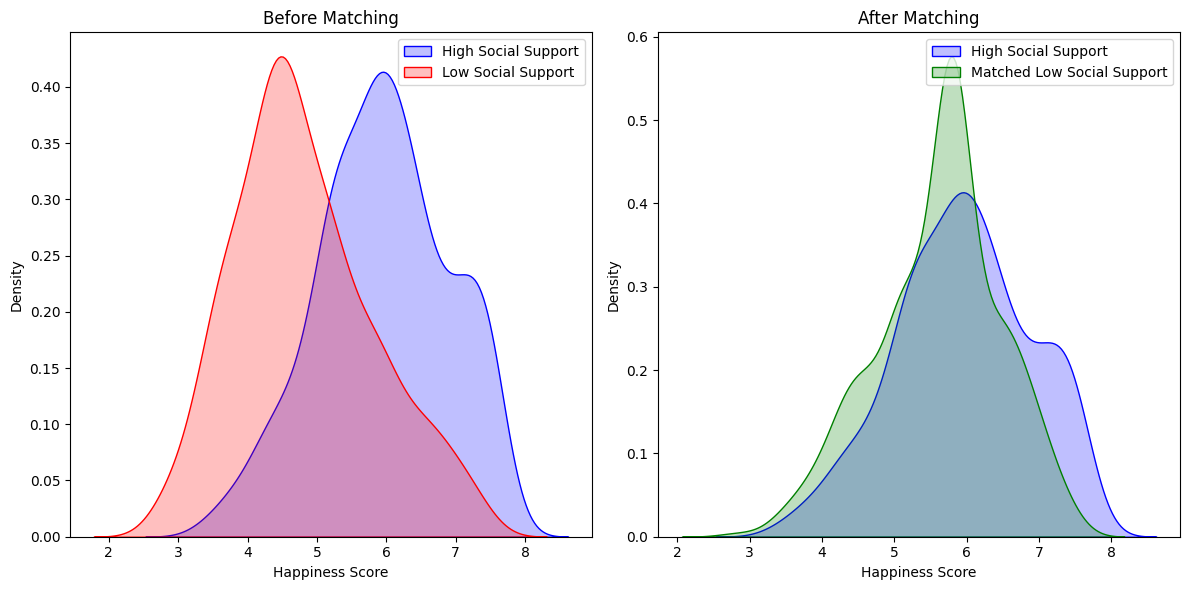

In [33]:
# Necessary imports
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/nikbearbrown/INFO_7390_Art_and_Science_of_Data/main/CSV/TEH_World_Happiness_2015_2019_Imputed.csv')
# Example: Imputing missing values with the mean (for simplicity)
data.fillna(data.mean(), inplace=True)

# Assuming high social support (above median) as treatment
median_social_support = data['Social support'].median()
data['treatment'] = (data['Social support'] > median_social_support).astype(int)

# Define features for estimating propensity score and outcome variable
features_columns = ['GDP per capita', 'Healthy life', 'Freedom', 'Generosity', 'Corruption']
X = data[features_columns].dropna()
y = data.loc[X.index, 'treatment']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Logistic regression to estimate propensity scores
log_reg = LogisticRegression()
log_reg.fit(X_scaled, y)
propensity_scores = log_reg.predict_proba(X_scaled)[:, 1]
data.loc[X.index, 'propensity_score'] = propensity_scores

# Matching
treated = data[data['treatment'] == 1]
control = data[data['treatment'] == 0]
matched_idx, _ = pairwise_distances_argmin_min(treated[['propensity_score']], control[['propensity_score']])
matched_control = control.iloc[matched_idx]

# Visualizing the results
plt.figure(figsize=(12, 6))

# Before matching
plt.subplot(1, 2, 1)
sns.kdeplot(data[data['treatment'] == 1]['Happiness Score'], label='High Social Support', color='blue', shade=True)
sns.kdeplot(data[data['treatment'] == 0]['Happiness Score'], label='Low Social Support', color='red', shade=True)
plt.title('Before Matching')
plt.xlabel('Happiness Score')
plt.legend()

# After matching
plt.subplot(1, 2, 2)
sns.kdeplot(treated['Happiness Score'], label='High Social Support', color='blue', shade=True)
sns.kdeplot(matched_control['Happiness Score'], label='Matched Low Social Support', color='green', shade=True)
plt.title('After Matching')
plt.xlabel('Happiness Score')
plt.legend()

plt.tight_layout()
plt.show()


### Before Matching
- The distribution of happiness scores for the high social support group (blue) is visibly shifted to the right compared to the low social support group (red). This suggests that, prior to matching, countries with higher levels of social support reported higher happiness scores on average.
- There is some overlap between the distributions, but the difference is pronounced, indicating a potential relationship between social support and higher happiness scores.
- The width of the distributions suggests variability within both high and low social support groups, with a range of happiness scores within each.

### After Matching
- Post matching, the distributions of happiness scores for both high social support (blue) and matched low social support (green) groups are more closely aligned. This indicates that the matching process has successfully reduced the difference in observed covariates between the two groups.
- The peak of the matched low social support group’s distribution is now closer to that of the high social support group, suggesting that when controlling for other factors (GDP per capita, Healthy life, Freedom, Generosity, Corruption), the impact of social support on happiness scores is less pronounced.
- The similarity in distributions post-matching implies that other factors being equal, the difference in happiness scores between high and low social support countries may be smaller than initially observed.

### Overall Insights
- The initial differences in happiness scores between the high and low social support groups may have been influenced by imbalances in covariates such as economic factors, freedom, generosity, and perceptions of corruption. After matching, these confounding factors are accounted for, providing a clearer view of the relationship between social support and happiness.
- While there still appears to be a positive association between social support and happiness scores after matching, the effect size may be smaller than what is observed without controlling for other variables. This underscores the importance of considering multiple factors when examining the determinants of happiness.
- The reduction in variability within the matched groups also suggests that the matching process has created a more homogeneous comparison, which is crucial for making causal inferences.
- It's important to note that propensity score matching controls for observed variables, but any hidden biases due to unobserved variables could still affect the results. Therefore, while the matched analysis provides valuable insights, it is not definitive proof of causation.

In conclusion, the propensity score matching analysis indicates that social support is positively associated with happiness scores but also highlights that this relationship is nuanced and influenced by various other factors. This analysis serves as a powerful example of how PSM can be used to refine our understanding of complex relationships in observational data.

### References

1. Pearl, J. (2009). Causality: Models, Reasoning, and Inference. Cambridge University Press.
2. Rubin, D.B. (2005). Causal Inference Using Potential Outcomes: Design, Modeling, Decisions. Journal of the American Statistical Association.
3. Hernán, M.A., & Robins, J.M. (2020). Causal Inference: What If. Chapman & Hall/CRC.
4. Rosenbaum, P.R., & Rubin, D.B. (1983). The central role of the propensity score in observational studies for causal effects. Biometrika, 70(1), 41-55.
5. Stuart, E.A. (2010). Matching methods for causal inference: A review and a look forward. Statistical Science, 25(1), 1-21.